# Segmentación de triángulos

### Alumna: Salma Patricia Gutiérrez Rivera

__1.__ Segmentar las aristas de los triángulos. En los resultados, mostrar la imagen binaria de las aristas.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import math

In [2]:
triangulos = cv.imread("images/Triangulos.PNG", 0)

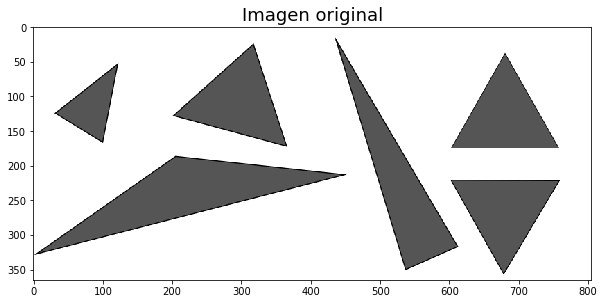

In [3]:
fig = plt.figure(figsize = (10, 5))
fig.add_subplot(1, 1, 1)
plt.imshow(triangulos, cmap = 'gray');
plt.title("Imagen original", size = 18);

In [4]:
bin_triang = np.where(triangulos < 170, 255, 0)

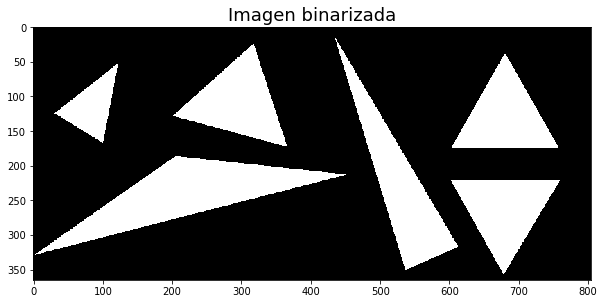

In [5]:
fig = plt.figure(figsize = (10, 5))
fig.add_subplot(1, 1, 1)
plt.imshow(bin_triang, cmap = 'gray');
plt.title("Imagen binarizada", size = 18);

In [6]:
padd_bin_triang = cv.copyMakeBorder(bin_triang, 5, 5, 5, 5, cv.BORDER_CONSTANT)
imgu8 = np.uint8(padd_bin_triang)
contor = cv.Canny(imgu8, 50, 200, None, 3)

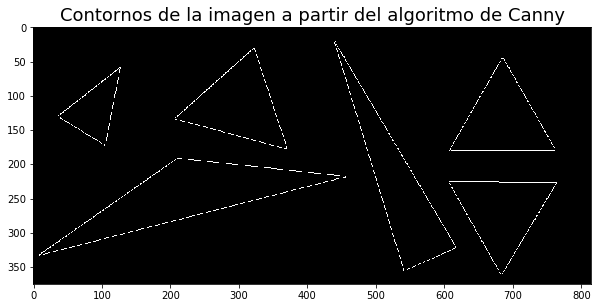

In [7]:
fig = plt.figure(figsize = (10, 5))
fig.add_subplot(1, 1, 1)
plt.imshow(contor, cmap = 'gray');
plt.title("Contornos de la imagen a partir del algoritmo de Canny", size = 18);

__2.__ Encontrar los modelos de las rectas que forman cada arista. Para esto, solicite un umbral que elimine a las posibles aristas de longitud menor a dicho umbral. Los parámetros que debe encontrar de cada arista son $\theta$, $\rho$ y longitud. Hacer una tabla donde cada renglón sea una arista (identifíquelas con un número) y las columnas sean los parámetros indicados.

In [54]:
img_con_lineas = cv.cvtColor(contor, cv.COLOR_GRAY2BGR)
lineas = cv.HoughLines(contor, 1, np.pi / 180, 93, None, 0, 0)

for i in range(len(lineas)):
    rho = lineas[i][0][0]
    theta = lineas[i][0][1]
    a = math.cos(theta)
    b = math.sin(theta)
    x0 = a * rho
    y0 = b * rho
    pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
    pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
    cv.line(img_con_lineas, pt1, pt2, (0,0,255), 1, cv.LINE_AA)

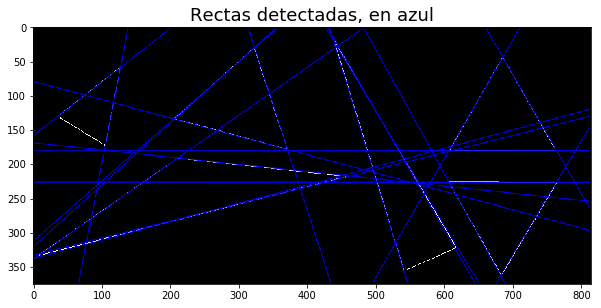

In [56]:
fig = plt.figure(figsize = (10, 5))
fig.add_subplot(1, 1, 1)
plt.imshow(img_con_lineas);
plt.title("Rectas detectadas, en azul", size = 18);

In [10]:
print('Se detectaron', lineas.shape[0], 'rectas en la imagen')

Se detectaron 19 rectas en la imagen


Lo anterior indica __2 falsos negativos__ y __3 falsos positivos__, que más bien son redundancias.

In [57]:
print("recta\tradio    ángulo")

for i in range(len(lineas)):
    rho = lineas[i][0][0]
    theta = lineas[i][0][1] * 180.0 / math.pi
    print(i, "\t", rho, "   ", theta)

recta	radio    ángulo
0 	 -414.0     162.99999201387476
1 	 277.0     54.999999253784715
2 	 168.0     96.00000267144338
3 	 323.0     75.99999983816295
4 	 180.0     90.00000250447816
5 	 -366.0     149.0000030079379
6 	 772.0     30.99999858592387
7 	 -298.0     161.99999767787153
8 	 136.0     11.000000021511672
9 	 238.0     48.00000133572169
10 	 616.0     30.000000834826057
11 	 -422.0     151.00000534032267
12 	 235.0     48.9999990868195
13 	 124.0     51.999999170302104
14 	 -372.0     149.99999734394112
15 	 76.0     104.99999950679661
16 	 326.0     74.99999867197056
17 	 -572.0     149.99999734394112
18 	 226.0     90.00000250447816


In [145]:
img_con_lineasp = cv.cvtColor(contor, cv.COLOR_GRAY2BGR)
lineas_p = cv.HoughLinesP(contor, 1, np.pi / 180, 45, None, 50, 7)

for i in range(len(lineas_p)):
    l = lineas_p[i][0]
    cv.line(img_con_lineasp, (l[0], l[1]), (l[2], l[3]), (0,0,255), 1, cv.LINE_AA)

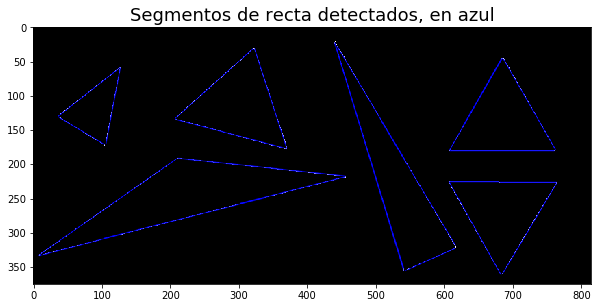

In [149]:
fig = plt.figure(figsize = (10, 5))
fig.add_subplot(1, 1, 1)
plt.imshow(img_con_lineasp);
plt.title("Segmentos de recta detectados, en azul", size = 18);

In [150]:
print("Se detectaron", lineas_p.shape[0], "segmentos de recta")

Se detectaron 24 segmentos de recta


Claramente, están algunas cortadas y las etiquetas no van a coincidir :(

In [148]:
print("segmento\tlongitud")

for i in range(len(lineas_p)):
    l = lineas_p[i][0]
    longitud = math.sqrt((l[2] - l[0])**2 + (l[3] - l[1])**2)
    print(i, "\t", longitud)

segmento	longitud
0 	 246.34325645326686
1 	 347.97988447610015
2 	 246.37572932413616
3 	 191.049731745428
4 	 155.79473675320358
5 	 153.0
6 	 153.83432646844463
7 	 241.32343441945292
8 	 154.5477272560163
9 	 152.42703172337903
10 	 210.77238908357992
11 	 114.63420083029322
12 	 152.97058540778355
13 	 112.96902230257638
14 	 83.0
15 	 154.5477272560163
16 	 168.57639217873896
17 	 158.86157496386593
18 	 341.9488265808204
19 	 72.0
20 	 81.02468759581859
21 	 122.97154142320898
22 	 78.03204469959762
23 	 115.10430052782563


__3.__ Encontrar las aristas que son paralelas. Reporte cuántos grupos de aristas paralelas encontró y cuáles son paralelas entre ellas.

La rectas paralelas son las que tienen mismo ángulo y distinto radio. Por ahora, no voy a dar tolerancia.

In [16]:
mp = dict()

for i in range(lineas.shape[0]): 
    if lineas[i][0][1] in mp.keys():
        mp[lineas[i][0][1]][0].append(i)
        mp[lineas[i][0][1]][1] += 1
    else: 
        mp[lineas[i][0][1]] = [[i], 1]

ans = 0

for it in mp: 
    count = mp[it][1] 
    ans += (count * (count - 1)) // 2
    
print("Hay", ans, "pares de líneas paralelas.")

for trash, notrash in mp.items():
    if len(notrash[0]) > 1:
        print('Las líneas', notrash[0], 'son paralelas entre sí.')
        
print('Estas líneas son las del primer conjunto de etiquetas.')

Hay 2 pares de líneas paralelas.
Las líneas [4, 18] son paralelas entre sí.
Las líneas [14, 17] son paralelas entre sí.
Estas líneas son las del primer conjunto de etiquetas.


Debería haber tres pares de paralelas mas las redundancias, si hubiera tolerancia.

__4.__ De la lista de aristas obtenidas en el objetivo 2, agrupe aquellas que formen los triángulos observados en la imagen. Haga una tabla donde los renglones identifiquen al triángulo y las columnas (3) sean los números que identifiquen a las aristas que lo forman.

Los triángulos están formados por conjuntos de tres segmentos de recta que se tocan. ¿Cómo saber que se tocan?